# Udacity Data Scientist Nanodegree - Project 1 (Data Science Blog Post)


## Analyzing Stack Overflow Developers 2020 Survey Data


### Business Objectives

In this notebook I used the 2020 developers survey data provided by Stackoverflow to answer the below questions:
1. How earnings and weekly working hours contribute in the job statisfiction 
2. Is there any correlation between the level of satisfaction about the current job and the seek for getting a new job?
3. Does the annual salary average change according to the educational level and years of experience ?

### Reading Data and Necessary Packages 

In [123]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv('survey_results_public.csv')

In [125]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [126]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [127]:
df.shape

(64461, 61)

### Question 1: How earnings and weekly working hours contribute in the job statisfiction ? 

### Data Preparation 

In [128]:
#Consider only those who are currently employed (full time/ part time/ freelancer and developer by profession
df = df [df.Employment.isin (['Employed full-time' , 'Independent contractor, freelancer, or self-employed' , 'Employed part-time'])]
df = df.loc[df.MainBranch == 'I am a developer by profession']

#### - Handling Missing values

In [129]:
df.JobSat.isnull().mean() #Around 10 percent of the records in JobSat are missing

0.09750521596306654

In [130]:
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0]) #fill the missing values in JobSeek with the mode
df['JobSeek'] = df['JobSeek'].fillna(df['JobSeek'].mode()[0])#fill the missing values in JobSeek with the mode 

In [131]:
df.ConvertedComp.isnull().mean() #Around 30% in ConvertedComp is missing

0.2997292138322901

In [132]:
df['ConvertedComp'] = df['ConvertedComp'].fillna(df.groupby('Country')['ConvertedComp'].transform('mean')) #replace missing in salary with the average salary according to each country
df = df.dropna(subset=['ConvertedComp']) #drop the remaining missing 

In [133]:
df.WorkWeekHrs.isnull().mean()

0.17427948763565201

In [134]:
df['WorkWeekHrs'] = df['WorkWeekHrs'].fillna(df.WorkWeekHrs.mean())

### Data Exploring and Visualization

#### -  Annual Salary According to Job Satisfaction

In [135]:
df.JobSat.value_counts(normalize= True)*100 #Percentage of respondents according to the level of satisfaction

Very satisfied                        39.083348
Slightly satisfied                    27.879826
Slightly dissatisfied                 14.156734
Neither satisfied nor dissatisfied    11.452589
Very dissatisfied                      7.427504
Name: JobSat, dtype: float64

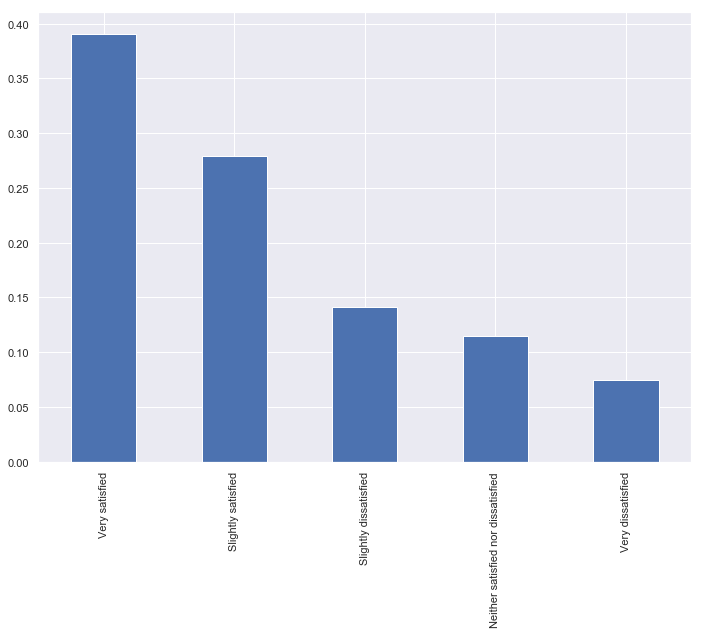

In [136]:
df.JobSat.value_counts(normalize= True).plot (kind = 'bar');

In [137]:
df.groupby('JobSat')['ConvertedComp'].mean() #Average annual salary according to level of satisfaction of the current job

JobSat
Neither satisfied nor dissatisfied     84121.510596
Slightly dissatisfied                  90591.907495
Slightly satisfied                     92850.026264
Very dissatisfied                      88504.516955
Very satisfied                        101753.601984
Name: ConvertedComp, dtype: float64

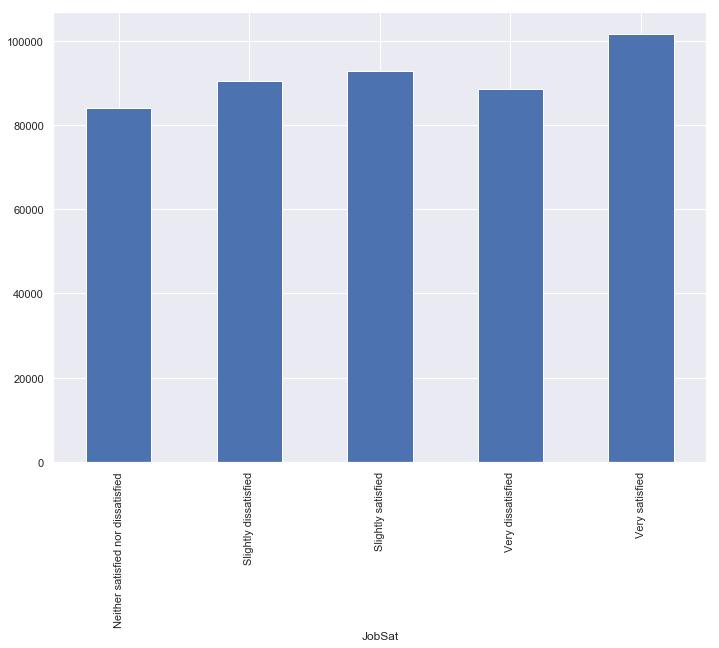

In [138]:
df.groupby('JobSat')['ConvertedComp'].mean().plot(kind = 'bar'); 

####  - Weekling working hours according to job satisfaction 

In [139]:
df.groupby('JobSat')['WorkWeekHrs'].mean() #No Significant difference notable

JobSat
Neither satisfied nor dissatisfied    40.239706
Slightly dissatisfied                 40.557575
Slightly satisfied                    40.463651
Very dissatisfied                     41.140958
Very satisfied                        40.901610
Name: WorkWeekHrs, dtype: float64

### Question 2: Is there any correlation between the level of satisfaction about the current job and the seek for getting a new job?

In [140]:
#labelling JobSeek variable
df.JobSeek[df.JobSeek == 'I am actively looking for a job'] = 'Actively looking for a Job'
df.JobSeek[df.JobSeek == 'I am not interested in new job opportunities'] = 'Not interested in a new Job'
df.JobSeek[df.JobSeek == 'I’m not actively looking, but I am open to new opportunities'] = 'Open to a new Job'

In [141]:
df.JobSeek.value_counts(normalize = True) #Percentage of Job-Seeking status 

Open to a new Job              0.648795
Not interested in a new Job    0.236079
Actively looking for a Job     0.115126
Name: JobSeek, dtype: float64

In [142]:
JobSat_Seek = pd.crosstab(df.JobSat, df.JobSeek , normalize   = 'index') *100 # Percentage of job-seeking status according to Job statisfaction level
JobSat_Seek.round(1) 

JobSeek,Actively looking for a Job,Not interested in a new Job,Open to a new Job
JobSat,,,
Neither satisfied nor dissatisfied,18.6,9.1,72.3
Slightly dissatisfied,24.9,7.1,68.0
Slightly satisfied,8.8,18.9,72.3
Very dissatisfied,29.0,24.7,46.3
Very satisfied,3.2,37.0,59.8


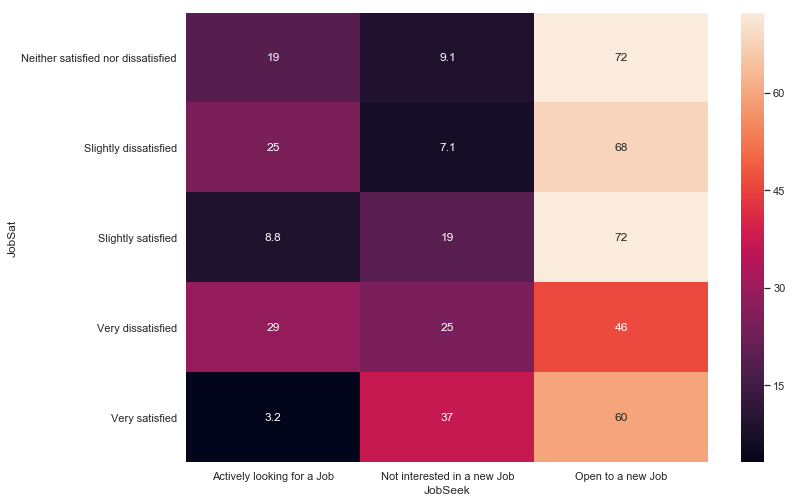

In [143]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(JobSat_Seek.round(1)  , annot=True);

In [144]:
pd.crosstab(df.JobSat, df.JobSeek , normalize   = 'columns') *100

JobSeek,Actively looking for a Job,Not interested in a new Job,Open to a new Job
JobSat,,,
Neither satisfied nor dissatisfied,18.543558,4.399020,12.760925
Slightly dissatisfied,30.577555,4.276564,14.838046
Slightly satisfied,21.267143,22.334213,31.071123
Very dissatisfied,18.698088,7.780708,5.299057
Very satisfied,10.913657,61.209495,36.030848


### Question 3: Does the annual salary average change according to the educational level and years of experience ?


### Data preparation ( Handling missing values and categorical data)

In [145]:
df.EdLevel.isnull().mean()

0.0886852873154243

In [146]:
df['EdLevel'] = df['EdLevel'].fillna(df['EdLevel'].mode()[0])#fill missing values in education with the mode 

#labelling Education variable
df.EdLevel[df.EdLevel == 'Associate degree (A.A., A.S., etc.)'] = 'Associate Degree'
df.EdLevel[df.EdLevel == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'] = 'Bachelor Degree'
df.EdLevel[df.EdLevel == 'I never completed any formal education'] = 'No Formal Education'
df.EdLevel[df.EdLevel == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'] = 'Master  Degree'
df.EdLevel[df.EdLevel == 'Other doctoral degree (Ph.D., Ed.D., etc.)'] = 'Doctoral Degree'
df.EdLevel[df.EdLevel == 'Primary/elementary school'] = 'Primary School'
df.EdLevel[df.EdLevel == 'Professional degree (JD, MD, etc.)'] = 'Professional Degree'
df.EdLevel[df.EdLevel == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'] = 'Secondary school'
df.EdLevel[df.EdLevel == 'Some college/university study without earning a degree'] = 'University without a degree'

In [158]:
df['EdLevel'] = pd.Categorical(df['EdLevel'], categories=['No Formal Education', 'Primary School', 'Secondary school','University without a degree', 'Professional Degree' , 'Associate Degree' , 'Bachelor Degree' , 'Master  Degree' , 'Doctoral Degree'], ordered=True)
                                                                                                                                         

In [147]:
#Convert YearsCodePro into numerical variable
df.loc[(df['YearsCodePro']  == 'Less than 1 year') , 'YearsCodePro'] = 0 
df.loc[(df['YearsCodePro']  == 'More than 50 years') , 'YearsCodePro'] = 50 
df['YearsCodePro'] = df['YearsCodePro' ].apply(pd.to_numeric)

In [151]:
#Group the years of experience in a categorical variable 

df.loc[df.YearsCodePro <= 1 , 'YearCodeProCate'] = 'One year by maximum'
df.loc [(df.YearsCodePro >1) & (df.YearsCodePro <= 3) , 'YearCodeProCate'] = 'Between 1-3 Years'
df.loc [(df.YearsCodePro >3) & (df.YearsCodePro <= 5), 'YearCodeProCate'] = 'Between 3-5 Years'
df.loc [(df.YearsCodePro >5) & (df.YearsCodePro <= 10), 'YearCodeProCate'] = 'Between 5-10 Years'
df.loc [(df.YearsCodePro >10) & (df.YearsCodePro <= 20), 'YearCodeProCate'] = 'Between 10-20 Years'
df.loc [(df.YearsCodePro >20) & (df.YearsCodePro <= 30), 'YearCodeProCate'] = 'Between 20-30 Years'
df.loc [(df.YearsCodePro >30) & (df.YearsCodePro <= 40), 'YearCodeProCate'] = 'Between 30-40 Years'
df.loc [(df.YearsCodePro >40) & (df.YearsCodePro <= 50), 'YearCodeProCate'] = 'Between 40-50 Years'
df.loc[df.YearsCodePro > 50, 'YearCodeProCate'] = 'More than 50 Years'

In [170]:
df['YearCodeProCate'] = pd.Categorical(df['YearCodeProCate'], categories=['One year by maximum', 'Between 1-3 Years', 'Between 3-5 Years' ,'Between 5-10 Years', 'Between 10-20 Years' , 'Between 20-30 Years' , 'Between 30-40 Years' , 'Between 40-50 Years' , 'More than 50 Years'], ordered=True)
df['YearCodeProCate'] = df['YearCodeProCate'].fillna(df['YearCodeProCate'].mode()[0]) # replace missing values with mode

### Data Exploring and Visualization

In [183]:
df.EdLevel.value_counts()*100 #distribution of education levels

Bachelor Degree                2484000
Master  Degree                 1051200
University without a degree     459700
Secondary school                172100
Associate Degree                131400
Doctoral Degree                  98300
Professional Degree              55600
No Formal Education              25800
Primary School                   18700
Name: EdLevel, dtype: int64

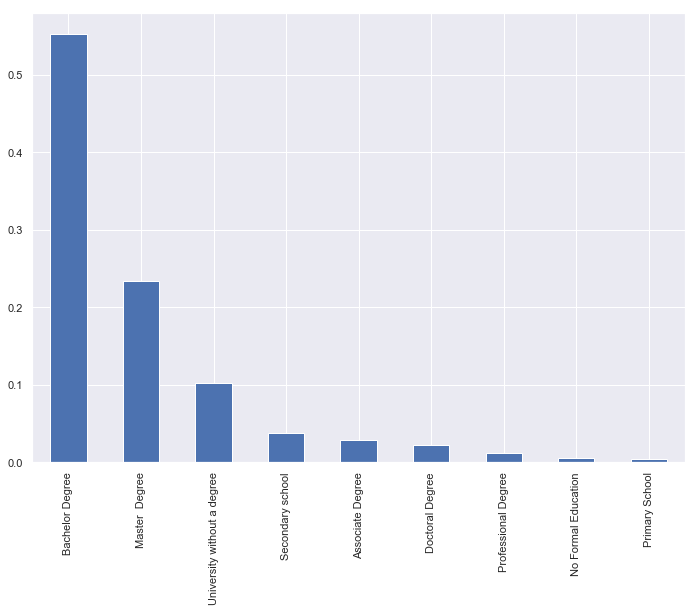

In [184]:
df.EdLevel.value_counts(normalize = True).plot (kind = 'bar'); 

In [185]:
df.groupby('EdLevel')['ConvertedComp'].mean() #Average annual salary according to education level

EdLevel
No Formal Education             84756.943621
Primary School                 107831.510215
Secondary school                79838.074321
University without a degree     93652.118067
Professional Degree             71477.385080
Associate Degree               103647.322720
Bachelor Degree                 93756.329755
Master  Degree                  97069.106355
Doctoral Degree                124858.292628
Name: ConvertedComp, dtype: float64

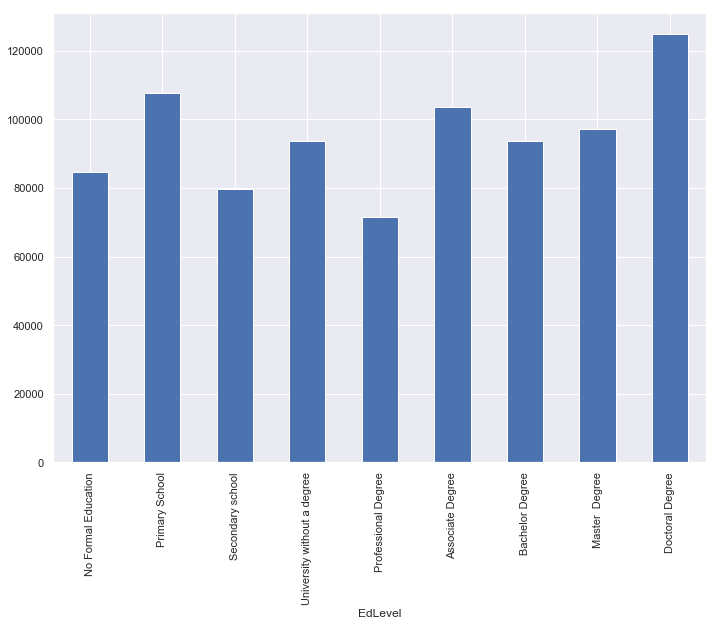

In [186]:
df.groupby('EdLevel')['ConvertedComp'].mean().plot (kind = 'bar'); #Average Salary according to education level

In [187]:
df.YearCodeProCate.value_counts()*100 #Distribution of years of experince groups 

Between 5-10 Years     1409700
Between 1-3 Years       858300
Between 10-20 Years     790400
Between 3-5 Years       696500
One year by maximum     419500
Between 20-30 Years     238600
Between 30-40 Years      69900
Between 40-50 Years      13900
More than 50 Years           0
Name: YearCodeProCate, dtype: int64

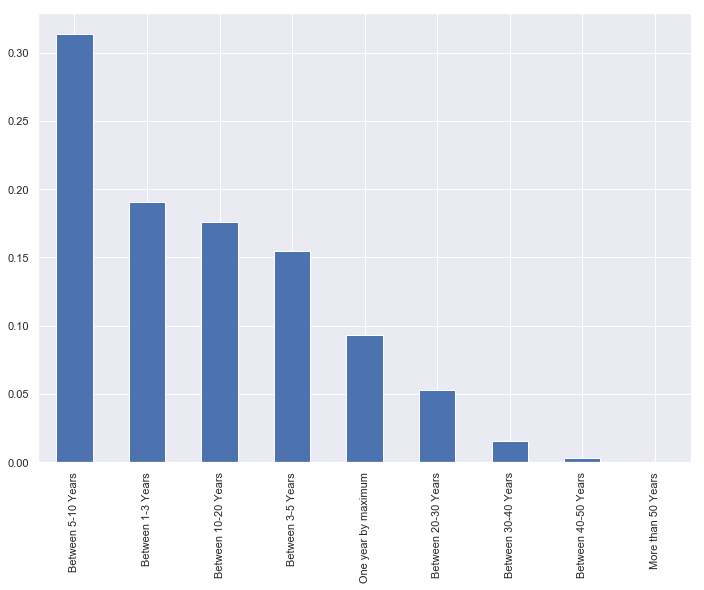

In [188]:
df.YearCodeProCate.value_counts(normalize = True). plot (kind = 'bar') ;

In [189]:
df.groupby('YearCodeProCate')['ConvertedComp'].mean() #Average annual salary according to years of experince 

YearCodeProCate
One year by maximum     64428.151061
Between 1-3 Years       71681.525969
Between 3-5 Years       86288.500268
Between 5-10 Years      91932.804764
Between 10-20 Years    125238.792464
Between 20-30 Years    149025.283505
Between 30-40 Years    149515.540605
Between 40-50 Years    183103.555998
More than 50 Years               NaN
Name: ConvertedComp, dtype: float64

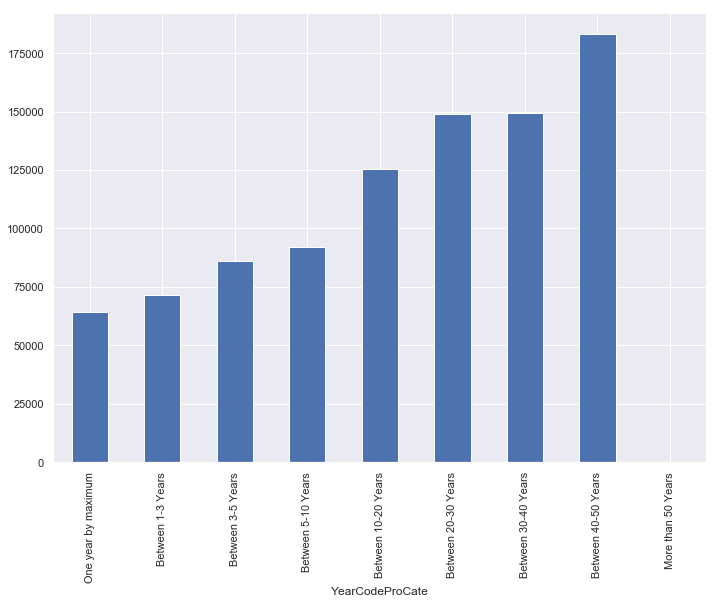

In [178]:
df.groupby('YearCodeProCate')['ConvertedComp'].mean().plot (kind = 'bar'); #Average salary according to years of code experince 

In [190]:
#Average annual salary according to education and years of experience
Sal_Edu_YearPro = df.groupby(['EdLevel' , 'YearCodeProCate'])['ConvertedComp'].mean().round(1)
Sal_Edu_YearPro = pd.DataFrame(Sal_Edu_YearPro).reset_index()
Sal_Edu_YearPro = Sal_Edu_YearPro.pivot("EdLevel", "YearCodeProCate", "ConvertedComp")
Sal_Edu_YearPro

YearCodeProCate,One year by maximum,Between 1-3 Years,Between 3-5 Years,Between 5-10 Years,Between 10-20 Years,Between 20-30 Years,Between 30-40 Years,Between 40-50 Years
EdLevel,,,,,,,,
No Formal Education,45239.1,64820.9,73716.3,87179.4,104420.5,90161.0,416859.8,63483.5
Primary School,152578.9,91441.5,59795.6,47903.5,120016.7,166790.0,129547.0,2000000.0
Secondary school,59262.6,64908.5,73601.2,77500.7,107186.5,134106.6,92136.6,79139.5
University without a degree,52447.9,80775.1,95754.6,82857.1,118251.1,129458.1,128222.9,122130.1
Professional Degree,75846.8,42535.3,63413.6,67345.3,76123.7,135146.8,127121.2,74033.6
Associate Degree,65410.3,114368.9,71587.1,93595.5,129156.8,154179.1,149924.5,126278.9
Bachelor Degree,64032.0,67208.9,88449.8,91770.0,135750.5,171679.3,154608.5,213107.4
Master Degree,73493.9,72293.7,83034.1,97288.7,116657.7,130374.1,157453.7,169486.1
Doctoral Degree,79908.0,159927.8,93275.3,108737.2,135696.5,134435.1,152736.0,219267.1


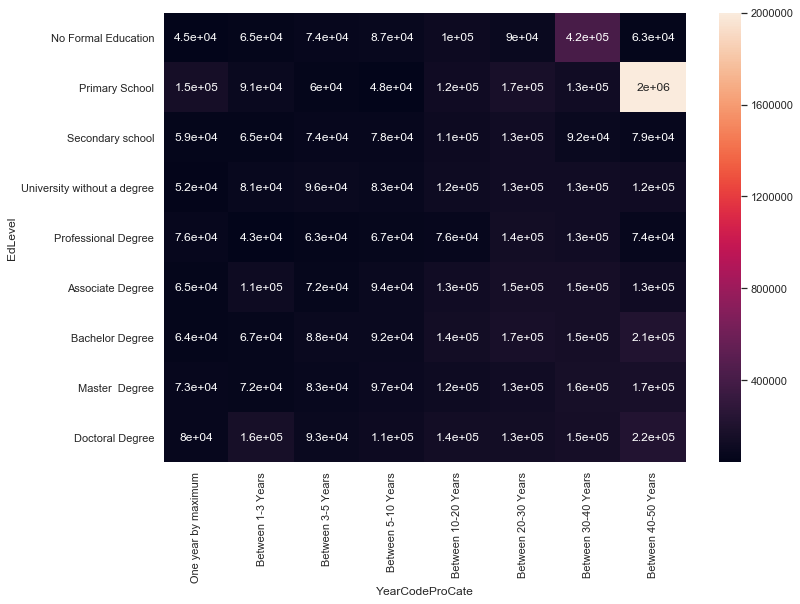

In [191]:
sns.heatmap(Sal_Edu_YearPro , annot= True);

### Conclusion

- Job satisfaction was attributed to the annual earnings, respondents were paid higher tend to report high level of job satisfaction. However, the working hours was not a significant factor for determining respondents job satisfaction.
- Respondents rarely seek another job when they feel satisfied about the current job, also dissatisfaction pushes workers hardly to look for a better job, and in most of the cases, the low earning is the main driver for job dissatisfaction.
- Years of experience and educational level are somehow complementing each other, respondents with lower educational level and relatively higher years of experience get better salaries.